In [4]:
import pandas as pd
import neattext.functions as nfx


In [5]:
import sys
!{sys.executable} -m pip install neattext



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [9]:
df=pd.read_csv("udemy_courses.csv")


In [10]:
df.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [17]:
df['clean_course_title']=df['course_title'].apply(nfx.remove_stopwords)

In [18]:
df['clean_course_title']=df['course_title'].apply(nfx.remove_special_characters)

In [19]:
dir(nfx)


['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [20]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Your ...
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,Financial Modeling for Business Analysts and C...
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,Beginner to Pro Financial Analysis in Excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,How To Maximize Your Profits Trading Options


In [21]:
df[["course_title","clean_course_title"]]

,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Your ...
2,Financial Modeling for Business Analysts and C...,Financial Modeling for Business Analysts and C...
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner to Pro Financial Analysis in Excel 2017
4,How To Maximize Your Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery from Scratch Master of JavaScrip...
3674,How To Design A WordPress Website With No Codi...,How To Design A WordPress Website With No Codi...
3675,Learn and Build using Polymer,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects on Your ...


In [22]:
countvect=CountVectorizer()
cv_mat=countvect.fit_transform(df['clean_course_title'])

In [23]:
cv_mat

<3678x3676 sparse matrix of type '<class 'numpy.int64'>'
	with 23407 stored elements in Compressed Sparse Row format>

In [24]:
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
df_cv_words=pd.DataFrame(cv_mat.todense(),columns=countvect.get_feature_names_out())

In [28]:
df_cv_words.head()

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
cosine_sim_mat=cosine_similarity(cv_mat)

In [30]:
cosine_sim_mat

array([[1.        , 0.1767767 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1767767 , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.16903085, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16903085, ..., 1.        , 0.        ,
        0.31622777],
       [0.        , 0.125     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.31622777, 0.        ,
        1.        ]])

<AxesSubplot:>

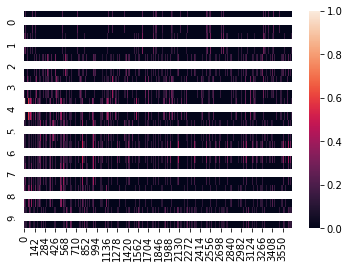

In [31]:
import seaborn as sns
sns.heatmap(cosine_sim_mat[0:10],annot=True)

In [32]:
course_indices=pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [33]:
course_indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3673
How To Design A WordPress Website With No Coding At All        3674
Learn and Build using Polymer                                  3675
CSS Animations: Create Amazing Effects on Your Website         3676
Using MODX CMS to Build Websites: A Beginner's Guide           3677
Length: 3678, dtype: int64

In [42]:
def recommend_course(title,num_of_rec=10):
    # ID for title
    idx = course_indices[title]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = list(enumerate(cosine_sim_mat[idx]))
    # Scores
    # Sort Scores
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    # Recomm
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)
    

In [45]:
recommend_course('PHP with PDO - ULTIMATE Crash Course')

,course_title,similarity_scores
2731,Angular 2 Crash Course with TypeScript,0.547723
2828,Getting Started with LESS - Beginner Crash Course,0.462910
2611,The Complete PHP MySQL Professional Course wit...,0.433013
2980,Crash Course - Learn to Create a PHP MVC Frame...,0.433013
3460,Complete PHP Course with OOP Start to Finish!,0.433013
0,Ultimate Investment Banking Course,0.408248
369,Cost Accounting Crash Course,0.408248
2802,Ultimate WordPress Plugin Course,0.408248
3423,SASS - Beginner Crash Course,0.408248
3474,The Ultimate jQuery Course,0.408248


In [44]:
df.to_csv("udemy_courses_clean.csv")